# MA943 - Numerical Methods

In [12]:
using PyPlot

# my functions
include("modules/recursion.jl");
# contains one function with the signiture 
# recursion_hom(c₁,c₂,a₁,a₂,steps,num_type="F64")
# num_type: F64, F32, Big sets Float64, Float32 or BigFloat arithmetic

In [16]:
Terms_32 = recursion_hom(2,-(8/9),1,2/3,80,"KFBKDSBIPDvb");
println(Terms_32)

Enter num_type 'F64', 'F32', or 'Big' for arithmetic type. Got: KFBKDSBIPDvb
nothing


The file 'recursion.jl' contains a single function to compute
a homogeneous recursion of the form
\begin{align*}
    a_{n+1} = c_{1}a_{n} + c_{2}a_{n-1}, \enspace \text{with initial conditions } a_{1},a_{2}
\end{align*}

the function signiture is 'recursion_hom(c₁,c₂,a₁,a₂,steps,num_type="F64")'. The step controls
the maximum step size, $n$, and the final argument controls the arithmetic type: Float64=F64, Float32=F32, BigFloat=Big.

## Question 1: Precision of floating point arithmetic

Consider the recursion relation

$a_{n+1} = 2\, a_n - \frac{8}{9}\, a_{n-1}$

with the initial conditions $a_1=1$ and $a_2=\frac{2}{3}$. 

1. Calculate the first 80 terms in this sequence using single precision floating point arithmetic (Float32 in Julia). Plot the resulting sequence on a lin-log plot.

2. Repeat the calculation using double precision floating point arithmetic (Float64 in Julia) and add the results to to your plot.

3. Find the **general** solution of the recursion relation analytically (it should contain two arbitrary constants). Hint: start from the ansatz $a_n = x^n$ and find the the allowed values of $x$.

4. Find the solution that satisfies the initial conditions $a_1=1$ and $a_2=\frac{2}{3}$. 

5. Find the solution that satisfies the perturbed initial conditions $a_1=1$ and $a_2=\frac{2}{3}+\epsilon$. Use the answer to explain your numerical results.

6. Julia supports arbitrary precision floating point arithmetic using the BigFloat type (see https://docs.julialang.org/en/latest/manual/integers-and-floating-point-numbers/#Arbitrary-Precision-Arithmetic-1). Try to reproduce the exact solution for the first 80 terms in the sequence using 128 bit precision and show the results on your plot.

In [13]:
# the recursion in question is calculated as follows (for 80 terms)
# Float32
Terms_32 = recursion_hom(2,-(8/9),1,2/3,80,"F32");
# Float64
Terms_64 = recursion_hom(2,-(8/9),1,2/3,80, "F64");
# BigFloat
Terms_Big = recursion_hom(BigFloat(2),-(BigFloat(8)/BigFloat(9)),BigFloat(1),BigFloat(2)/BigFloat(3),80, "Big");

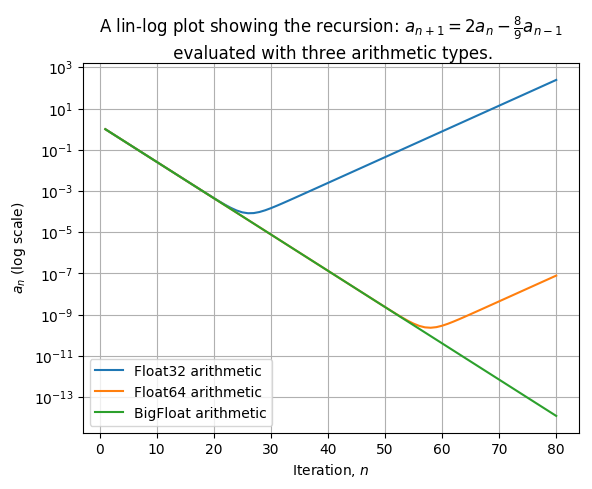

In [14]:
# All the plotting
n = 1:1:80

semilogy(n,Terms_32, label="Float32 arithmetic")
title("A lin-log plot showing the recursion: "L"a_{n+1}=2a_{n}-\frac{8}{9}a_{n-1}""\n evaluated with three arithmetic types.")
xlabel("Iteration, "L"n")
ylabel(L"a_{n}"" (log scale)")

semilogy(n,Terms_64, label="Float64 arithmetic")

semilogy(n,Terms_Big, label="BigFloat arithmetic")

grid()
legend()
show()


Solution of 
\begin{align*}
    a_{n+1} = 2\, a_n - \frac{8}{9}\, a_{n-1}, \enspace a_1=1, a_2=\frac{2}{3}
\end{align*}

The characteristic polynomial is found by the ansatz $\lambda^{n} = a_{n}$, the roots of this give the general
solution. The characteristic polynomial is

\begin{align*}
    \lambda^{n+1} = 2\lambda^{n}-\frac{8}{9}\lambda^{n-1} &\Rightarrow \lambda^{2} = 2\lambda-\frac{8}{9}
    \Rightarrow \lambda_{\pm} = \frac{2\pm\sqrt{4-4\cdot 8/9}}{2} = 1\pm\frac{1}{3}
\end{align*}

The general solution is then 
\begin{align*}
    a_{n} = C_{1}\biggl(\frac{4}{3}\biggr)^{n}+C_{2}\biggl(\frac{2}{3}\biggr)^{n}, \enspace a_{1}=1,a_{2}=\frac{2}{3}
\end{align*}

To satisfy the initial conditions we must satisfy 
    

## Question 2: Computational complexity of the mergesort algorithm

1. Verify that the function mergepresorted(A, B) works as described.
2. Write a recursive function that implements the mergesort algorithm for an array of integers whose length, $n$ is a power of 2: $n=2^m$. Verify that it works by generating some arrays of random integers and using your function to sort them.
3. Explain why the computational complexity, $F(n)$, of your mergesort algorithm satisfies the recursion
> $F(n) = 2\, F(\frac{n}{2}) + n\ \ \ \ $ with initial condition $F(1)=1$.  
4. Introduce the new variable p defined by $n = 2^p$ and let $b_p = F(2^p)$. Show that in these variables the above equation takes the form
> $b_p = 2 b_{p−1} + 2^p\ \ \ \ $ with initial condition $b_0 = 1$.
5. Find the general solution to the associated homogeneous recursion relation (ie without the $2^p$ term).
6. Find a particular solution of the original inhomogenous recursion relation and use the initial condition to determine the constant in the homogenous solution.
7. Hence show that the computational complexity of the mergesort algorithm is
> $F(n) = O(n\, \log n)$.
8. Use Julia's @timed macro to measure the execution time of your mergesort function for arrays of lengths $\{2^i : i =1 : 15\}$. Compare the results to the theoretical expectations.

In [18]:
include("modules/MSort.jl")
# contains two functions 
# mergepresorted(A::Array{Int64,1}, B::Array{Int64,1}) as given
# mergesort2(A::Array{Int64,1}) my own

mergesort2 (generic function with 1 method)

The file 'MSort.jl' contains two function with the signatures
'mergepresorted(A::Array{Int64,1}, B::Array{Int64,1})' as given with the question and my own function 'mergesort2(A::Array{Int64,1})'

This second function takes an unsorted array. If the array has length a power of 2 length nothing is changed otherwise the function adds 0's to the array until the length is a power of 2. The function then completes the merge sort algorithm.

The next box shows the operation of the mergepresorted function.

In [19]:
A = [1,2,3,4,5,8,10,14]
B = [3,6,8,9]

C = mergepresorted(A,B)

println(C)

[1,2,3,3,4,5,6,8,8,9,10,14]


Now given an unsorted array the next box shows the operation of the mergesort2 function.

In [21]:
A = [4,3,5,2,1,6,4,2,1];
P = mergesort2(A);

# next get rid of zeros, not in the function because there may be zeros
# in the input array. 
P=P[P.!=0]; 
println(P)

[1,1,2,2,3,4,4,5,6]


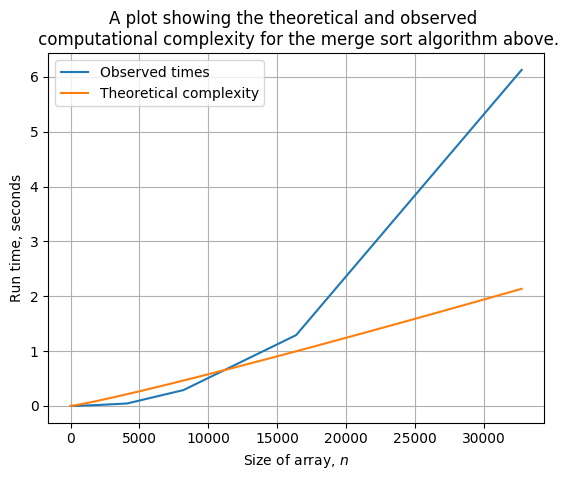

PyObject <matplotlib.legend.Legend object at 0x7ff42867f5d0>

In [26]:
# max power of 2
# N = 15

# Times = zeros(N)
# Lengths = zeros(N)

# for i in 1:N
#     S = rand(collect(1:100),2^i)
#     t = @timed mergesort2(S)
#     Times[i] = t[2]
#     Lengths[i] = length(t[1])
# end

# x = 0:1:Lengths[end]

plot(Lengths,Times, label="Observed times")

plot(x,Times[1].*(x.*log10.(x)), label="Theoretical complexity")

title("A plot showing the theoretical and observed \n computational complexity for the merge sort algorithm above.")

xlabel("Size of array, "L"n")
ylabel("Run time, seconds")

grid()
legend()